# Implementation of Conway's Game of Life 
## Using Convolution and Lebron James' Face

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from skimage.color import rgb2gray 
from skimage.filters import threshold_otsu
from scipy.ndimage import convolve
from PIL import Image
from IPython.display import HTML

Let's begin by loading a picture of Lebron James into a Numpy Array

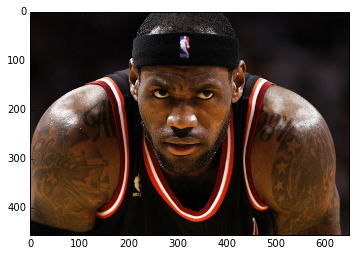

In [2]:
lebron = np.array(Image.open('./lebron.jpeg'))
plt.imshow(lebron)

Next, lets get rid of the color since we only want one value per pixel.

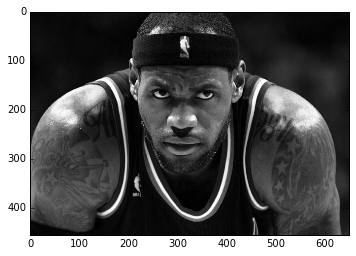

In [3]:
lebron_gray = rgb2gray(lebron)
plt.imshow(lebron_gray, cmap='Greys_r')

Finally, we will threshold the image to ensure that all the values are either 0 or 1 as required by the non-probabilistic game of life.

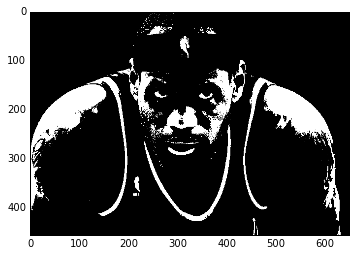

In [4]:
threshold = threshold_otsu(lebron_gray) 
lebron_thresh = (lebron_gray > threshold).astype(int)
fig=plt.figure()
im = plt.imshow(lebron_thresh, cmap='Greys_r')

We can count the neighbors for each cell using the 3x3 kernel shown below.  We then use numpy to determine whether there will be life in each cell during the next generation.  A cell will be alive in the next generation if either:
    - There are three neighbors 
    - The cell is alive and there are two neighbors

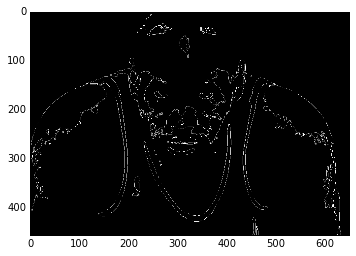

In [5]:
gol_kernel = np.array([
        [1,1,1],
        [1,0,1],
        [1,1,1]
    ])
lebron_neighbor_count = convolve(lebron_thresh, gol_kernel)
next_iter = (
    ((lebron_neighbor_count == 2) & lebron_thresh) | 
    (lebron_neighbor_count == 3)                     
).astype(int)
plt.imshow(next_iter, cmap='Greys_r')

In [6]:
def make_next_frame(prev):
    neighbor_count = convolve(prev, gol_kernel)
    next_iter = (
        ((neighbor_count == 2) & prev) | 
        (neighbor_count == 3)                     
    ).astype(int)
    return next_iter

In [7]:
frames = [lebron_thresh]
frame_count = 80
for i in range(0, frame_count-1):
    curr_frame = frames[i]
    next_frame = make_next_frame(curr_frame)
    frames.append(next_frame)

In [8]:
def updatefig(i):
    im.set_array(frames[i])
    return im,

In [9]:
anim = animation.FuncAnimation(fig, updatefig, frames=range(frame_count), 
                              interval=50, blit=True)

In [10]:
anim.save('animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [11]:
HTML("""
<video controls loop autoplay>
  <source src="https://github.com/nathanbreitsch/GameOfLife/blob/master/animation.mp4?raw=true" type="video/mp4">
</video>
""")